In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['font.family'] = 'monospace'
plt.style.use('fivethirtyeight')

In [3]:
from sklearn.datasets import load_boston
from mglearn.datasets import load_extended_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import set_config
set_config(print_changed_only=False)

In [4]:
def model_results(model):
    test_accuracy, train_accuracy, err, coef = [], [], [], []
    alphas = np.array([0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100])
    for alpha in alphas:
        mdl = model(alpha = alpha, max_iter=8000)
        mdl.fit(X_train, y_train)
        train_score = mdl.score(X_train, y_train)
        test_score = mdl.score(X_test, y_test)
        mse = mean_squared_error(y_test, mdl.predict(X_test))
        test_accuracy.append(test_score)
        train_accuracy.append(train_score)
        err.append(mse)
        coef.append(mdl.coef_)
    param_val = {'alpha':alphas}
    mdl = model()
    grid = GridSearchCV(mdl, param_grid = param_val, cv=5)
    grid.fit(X_train, y_train)
    best_alpha = grid.best_params_
    model = {'alphas':alphas,'test_accuracy':test_accuracy,
        'train_accuracy':train_accuracy, 'mse':err, 'best':best_alpha,'coef':coef}
    return model

In [5]:
def plot_fig(model, name):
    plt.figure(figsize=(8,8),dpi=150)
    plt.subplot(2,1,1)
    plt.plot(model['alphas'], model['train_accuracy'],label='Train Accuracy')
    plt.plot(model['alphas'], model['test_accuracy'], label='Test Accuracy')
    plt.axvline(model['best']['alpha'], color='orange',linestyle='--',
               label='best alpha')
    plt.xlabel('alpha')
    plt.ylabel('Scores')
    plt.legend()
    plt.xscale('log')
    plt.title(f'Alpha Vs Scores for {name}')

    plt.subplot(2,1,2)
    plt.plot(model['alphas'], model['mse'], label=name)
    plt.axhline(mean_squared_error(y_test, lr.predict(X_test)), color='red',
                linestyle='--', label='linear regression')
    plt.xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('test mse')

    plt.title(f'Alpha Vs MSE for {name}')
    plt.legend()
    plt.tight_layout()

In [6]:
X, y = load_extended_boston()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=13, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)
print(f"Test accuracy : {lr.score(X_test, y_test)}")
print(f"Train accuracy : {lr.score(X_train, y_train)}")
print(mean_squared_error(y_test, lr.predict(X_test)))

Test accuracy : 0.8429347286664692
Train accuracy : 0.9323190910664715
14.239658272086231


In [7]:
lasso = model_results(Lasso)
ridge = model_results(Ridge)

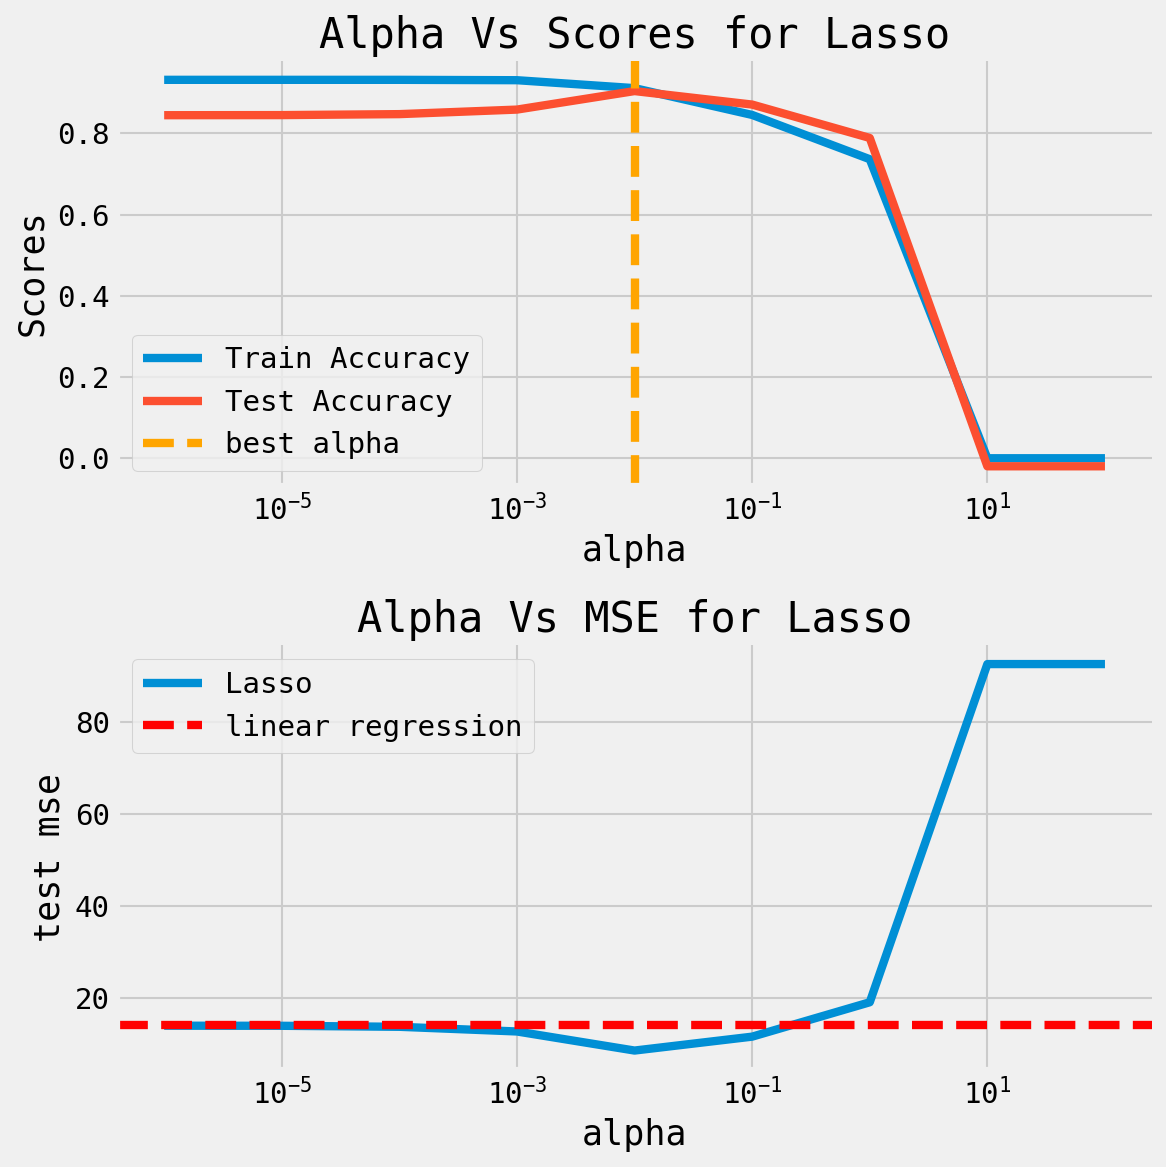

In [8]:
plot_fig(lasso, 'Lasso')

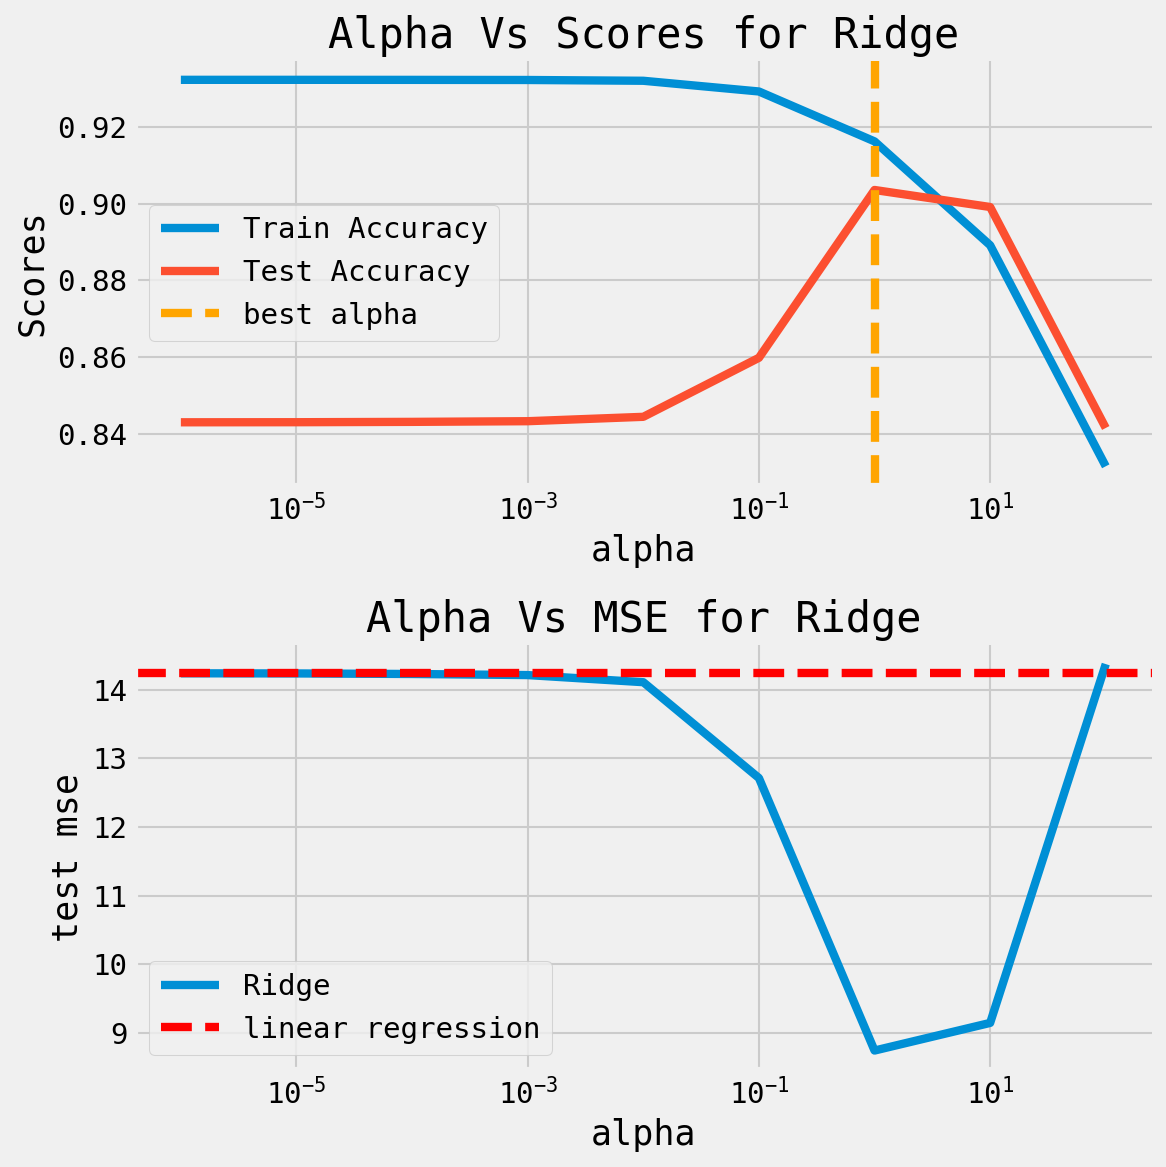

In [9]:
plot_fig(ridge, 'Ridge')

In [13]:
data = load_boston()

X, y = data['data'], data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=13, test_size=0.2)
lasso = model_results(Lasso)
ridge = model_results(Ridge)

ridge_coef_df = pd.DataFrame(np.concatenate(ridge['coef']).reshape(9,13),columns=data['feature_names'])
lasso_coef_df = pd.DataFrame(np.concatenate(lasso['coef']).reshape(9,13),columns=data['feature_names'])

Text(0.5, 1.0, 'Alpha Vs Coefficients (Ridge)')

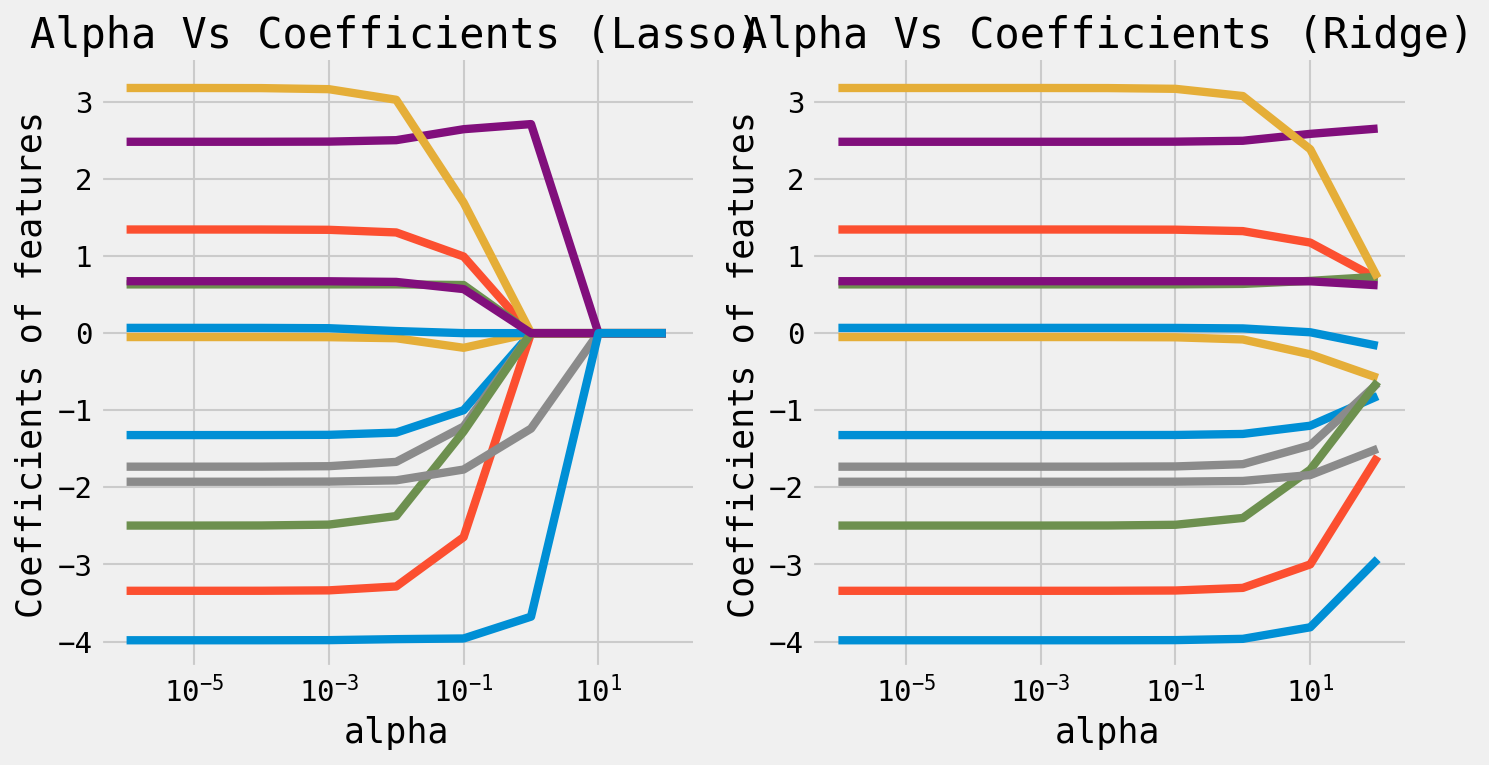

In [14]:
plt.figure(figsize=(10,5),dpi=150)
plt.subplot(1,2,1)
for name in data['feature_names']:
    plt.plot(lasso['alphas'], lasso_coef_df[name])
plt.xscale('log')
plt.ylabel('Coefficients of features')
plt.xlabel('alpha')
plt.title('Alpha Vs Coefficients (Lasso)')

plt.subplot(1,2,2)
for name in data['feature_names']:
    plt.plot(ridge['alphas'], ridge_coef_df[name])
plt.xscale('log')
plt.ylabel('Coefficients of features')
plt.xlabel('alpha')
plt.title('Alpha Vs Coefficients (Ridge)')